In [25]:
import pandas as pd
import numpy as np
import os
import subprocess

In [20]:
# defining folders
notebook_path = os.path.realpath(os.getcwd())
root_dir_path = os.path.dirname(notebook_path)
code_path = os.path.join(root_dir_path, 'VirtuousMultiTaste')
data_path = os.path.join(root_dir_path, 'data')
test_path = os.path.join(notebook_path, 'test')

In [13]:
# files used for training and test
test_file = data_path + os.sep + 'testing_dataset_fourtaste_problem.csv'
train_file = data_path + os.sep + 'training_dataset_fourtaste_problem.csv'

In [59]:
train_DB = pd.read_csv(train_file, sep='\t', header=0)
train_DB.Parent_SMILES.to_csv(test_path + os.sep + 'train_DB.txt', index=False, header=False)

# replace 'Tasteless' with 'Other' in the taste field to match the predictions labels
train_DB['Taste'] = train_DB['Taste'].replace('Tasteless', 'Other')

test_DB = pd.read_csv(test_file, sep='\t', header=0)
test_DB.Parent_SMILES.to_csv(test_path + os.sep + 'test_DB.txt', index=False, header=False)

# replace 'Tasteless' with 'Other' in the taste field
test_DB['Taste'] = test_DB['Taste'].replace('Tasteless', 'Other')

In [85]:
test_DB.head()

,Unnamed: 0,Taste,Std_SMILES,Parent_SMILES,SEQUENCE
0,0,Other,COc1cc(CCC(=O)c2c(O)cccc2O)ccc1O,COc1cc(CCC(=O)c2c(O)cccc2O)ccc1O,NaN
1,1,Bitter,O=C(/C=C/c1ccccc1)c1ccc(O)cc1,O=C(/C=C/c1ccccc1)c1ccc(O)cc1,NaN
2,2,Sweet,CC(C)(Cc1ccccc1)NC(=O)C(N)CC(=O)O,CC(C)(Cc1ccccc1)NC(=O)C(N)CC(=O)O,NaN
3,3,Sweet,CC(C)=CCCC(C)(O)C1CC(O)C(C)=CC1=O,CC(C)=CCCC(C)(O)C1CC(O)C(C)=CC1=O,NaN
4,4,Sweet,CC(=O)c1ccc2ccccc2c1,CC(=O)c1ccc2ccccc2c1,NaN


In [43]:
# run the code (un commment to run)
#subprocess.call(['python', code_path + os.sep + 'VirtuousMultiTaste.py', '-f', test_path + os.sep + 'train_DB.txt', '-d', 'test/train_output'])
#subprocess.call(['python', code_path + os.sep + 'VirtuousMultiTaste.py', '-f', test_path + os.sep + 'test_DB.txt', '-d', 'test/test_output'])

/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   1 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done   2 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done   3 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done   5 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done   6 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done   7 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done   8 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done  11 tasks      | elapsed:    4.6s
[Parallel(n_jobs=14)]: Done  12 t

0

In [61]:
# read prediciton file 
dominant_file_train =  test_path + os.sep + 'train_output' + os.sep + 'result_dominant_label.txt'
dominant_file_test  =  test_path + os.sep + 'test_output' + os.sep + 'result_dominant_label.txt'

In [80]:
# true values
true_values_train = train_DB.Taste
true_values_test  = test_DB.Taste
predicted_values_train = np.loadtxt(dominant_file_train, dtype=str, delimiter='\t')
predicted_values_test  = np.loadtxt(dominant_file_test, dtype=str, delimiter='\t')
predicted_values_train = [i[0] for i in predicted_values_train]
predicted_values_test  = [i[0] for i in predicted_values_test]

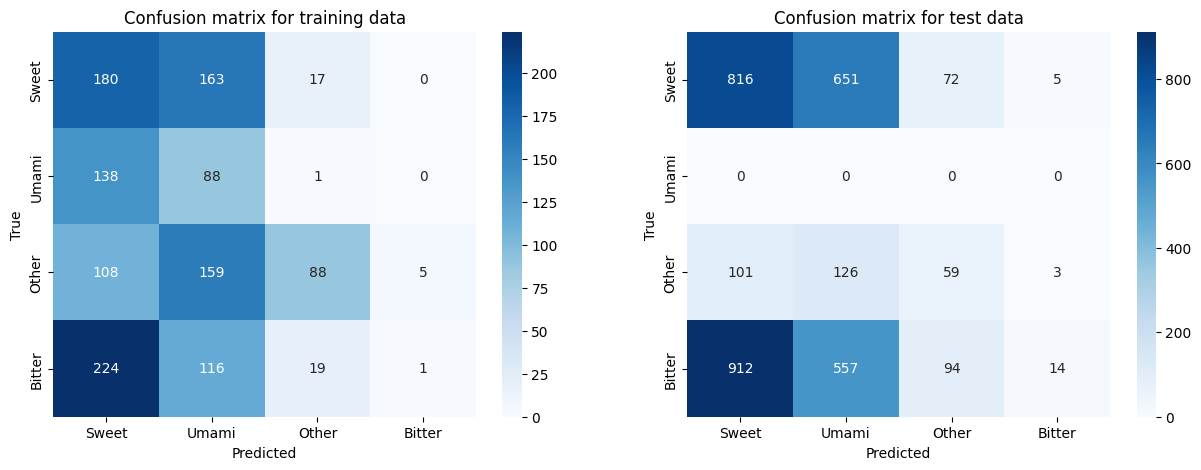

In [83]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix for training data
cm_train = confusion_matrix(true_values_train, predicted_values_train, labels=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_train = pd.DataFrame(cm_train, columns=['Sweet', 'Umami', 'Other', 'Bitter'], index=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_train

# confusion matrix for test data
cm_test = confusion_matrix(true_values_test, predicted_values_test , labels=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_test = pd.DataFrame(cm_test, columns=['Sweet', 'Umami', 'Other', 'Bitter'], index=['Sweet', 'Umami', 'Other', 'Bitter'])
cm_test

# plot confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.heatmap(cm_train, annot=True, ax=ax[0], cmap='Blues', fmt='g')
ax[0].set_title('Confusion matrix for training data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')
sns.heatmap(cm_test, annot=True, ax=ax[1], cmap='Blues', fmt='g')
ax[1].set_title('Confusion matrix for test data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')
plt.show()

In [84]:
# create classification report
from sklearn.metrics import classification_report
# classification report for training data
print ('****************************************************************************************')
print ('Classification report for TRAINING data')
print(classification_report(true_values_train, predicted_values_train))
# classification report for test data
print ('****************************************************************************************')
print ('Classification report for TEST data')
print(classification_report(true_values_test, predicted_values_test))

****************************************************************************************
Classification report for TRAINING data
              precision    recall  f1-score   support

      Bitter       0.17      0.00      0.01       360
       Other       0.70      0.24      0.36       360
       Sweet       0.28      0.50      0.36       360
       Umami       0.17      0.39      0.23       227

    accuracy                           0.27      1307
   macro avg       0.33      0.28      0.24      1307
weighted avg       0.35      0.27      0.24      1307

****************************************************************************************
Classification report for TEST data
              precision    recall  f1-score   support

      Bitter       0.64      0.01      0.02      1577
       Other       0.26      0.20      0.23       289
       Sweet       0.45      0.53      0.48      1544
       Umami       0.00      0.00      0.00         0

    accuracy                           

/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lorenzo/opt/anaconda3/envs/VIRTUOUS/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [90]:
from rdkit import Chem
import sys

In [91]:
def ReadMol (file, verbose=True):
    """
    Function to read input file in different file format, run sanification with RDKit and return RDKit mol object
    :param file: molecule file or string
    :return: RDKit molecule object
    """
    # SMILES is expected as input
    mol = Chem.MolFromSmiles(file, sanitize=False)

    if mol:
        type = 'SMILES'
    else:
        mol = Chem.MolFromFASTA(file, sanitize=False)
        if mol:
            type = 'FASTA'
        else:
            mol = Chem.MolFromSequence(file, sanitize=False)
            if mol:
                type = 'SEQUENCE'
            else:
                try:
                    mol = Chem.MolFromInchi(file, sanitize=False)
                except:
                    pass
                if mol:
                    type = 'Inchi'
                else:
                    try:
                        mol = Chem.MolFromPDBFile(file, sanitize=False)
                    except:
                        pass
                    if mol:
                        type = 'PDB'
                    else:
                        try:
                            mol = Chem.MolFromSmarts(file, sanitize=False)
                        except:
                            pass
                        if mol:
                            type = 'Smarts'
                        else:
                            try:
                                smi = pubchem_query(file, verbose=verbose)
                                mol = Chem.MolFromSmiles(smi, sanitize=False)
                            except:
                                pass
                            if mol:
                                type = 'pubchem name'
                            else:
                                sys.exit("\nError while reading your query compound: check your molecule!\nNote that "
                                         "allowed file types are SMILES, FASTA, Inchi, Sequence, Smarts or pubchem "
                                         "name")

    if verbose:
        print(f"Input has been interpeted as {type}")

    # try to sanitiaze the molecule
    try:
        Chem.SanitizeMol(mol)

    # if somithing goes wrong during sanitising
    except Exception as err:
        sys.exit("Error in the RDKit Sanification process: %s" %err)

    return mol


[10:48:24] SMILES Parse Error: syntax error while parsing: caffeine
[10:48:24] SMILES Parse Error: Failed parsing SMILES 'caffeine' for input: 'caffeine'


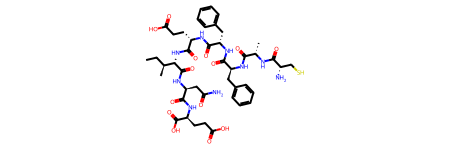

In [92]:
cpnd = 'caffeine'
mol = ReadMol(cpnd, verbose=False)
mol

In [94]:
mol = Chem.MolFromSmiles(file, sanitize=False)
if mol:
    print ('SMILES')
else:
    print ('NOT SMILES')

NOT SMILES


[10:50:02] SMILES Parse Error: syntax error while parsing: /var/folders/t0/zf7cxrc51fvfqdxck_h42z_h0000gn/T/ipykernel_24868/1626256485.py
[10:50:02] SMILES Parse Error: Failed parsing SMILES '/var/folders/t0/zf7cxrc51fvfqdxck_h42z_h0000gn/T/ipykernel_24868/1626256485.py' for input: '/var/folders/t0/zf7cxrc51fvfqdxck_h42z_h0000gn/T/ipykernel_24868/1626256485.py'


In [96]:
try:
    mol = Chem.MolFromSmiles(file, sanitize=False)
except:
    pass

[10:50:48] SMILES Parse Error: syntax error while parsing: /var/folders/t0/zf7cxrc51fvfqdxck_h42z_h0000gn/T/ipykernel_24868/1626256485.py
[10:50:48] SMILES Parse Error: Failed parsing SMILES '/var/folders/t0/zf7cxrc51fvfqdxck_h42z_h0000gn/T/ipykernel_24868/1626256485.py' for input: '/var/folders/t0/zf7cxrc51fvfqdxck_h42z_h0000gn/T/ipykernel_24868/1626256485.py'


In [97]:
mol

In [100]:
# check if a string a meaning as a word
import re
def is_word(s):
    return bool(re.match(r'^[a-zA-Z]+$', s))

is_word('CGHCHC')

True